## Libralies:

In [1]:
#All the libralies used in this project

#All the libralies used in this project

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
#from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

### Context: 

* This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Content: 

* price price in US dollars (\$326--\$18,823)

* carat weight of the diamond (0.2--5.01)

* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color diamond colour, from J (worst) to D (best)

* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table width of top of diamond relative to widest point (43--95)

### LOAD DATA

In [2]:
diamonds_data=pd.read_csv("diamonds.csv")
df = diamonds_data.copy()
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 11)

### DATA PREPROCESSING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [6]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

* No missing data.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


* There are zero values for x, y, z variables.

In [9]:
print('x with zero value: ', df['x'].value_counts()[0])
print('y with zero value: ', df['y'].value_counts()[0])
print('z with zero value: ', df['z'].value_counts()[0])

x with zero value:  8
y with zero value:  7
z with zero value:  20


In [10]:
df[['x','y','z']]=df[['x','y','z']].replace(0,np.NaN)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.20,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.00,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.00,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.00,950.00,2401.00,5324.25,18823.00
x,53932.0,5.732007,1.119670,3.73,4.71,5.70,6.54,10.74
y,53933.0,5.735270,1.140339,3.68,4.72,5.71,6.54,58.90
z,53920.0,3.540046,0.702530,1.07,2.91,3.53,4.04,31.80


### OUTLİERS DETECTİON

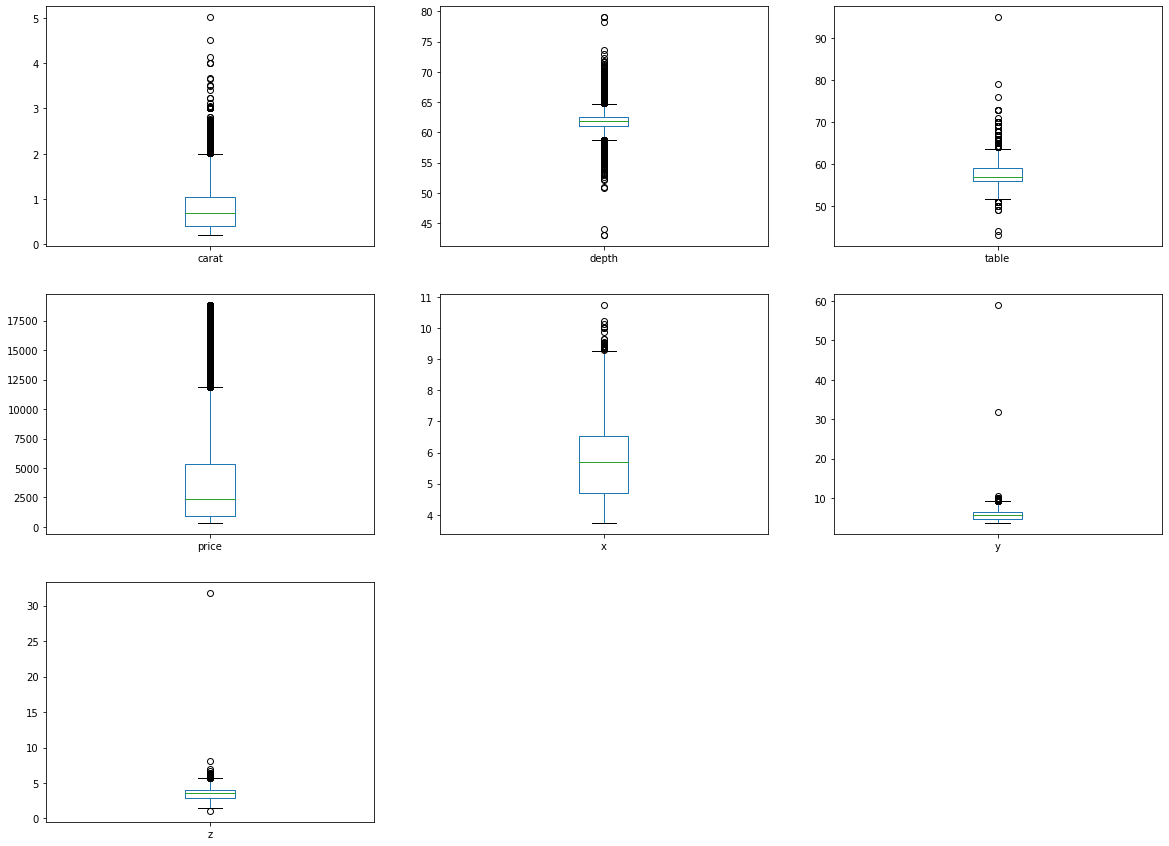

In [12]:
df.plot(kind='box',figsize=(20,15),subplots=True,layout=(3,3))
plt.show()

In [13]:
def outliers(var):
    a = []
    q1 = df[var].quantile(.25)
    q2 = df[var].quantile(.5)
    q3 = df[var].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in df[var]:
        if i > ulim:
            i=np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a

for col in df.select_dtypes(exclude='object').columns:
    df[col] = outliers(col)

In [14]:
df.isna().sum()

carat      1889
cut           0
color         0
clarity       0
depth      2545
table       605
price      3540
x            32
y            29
z            49
dtype: int64

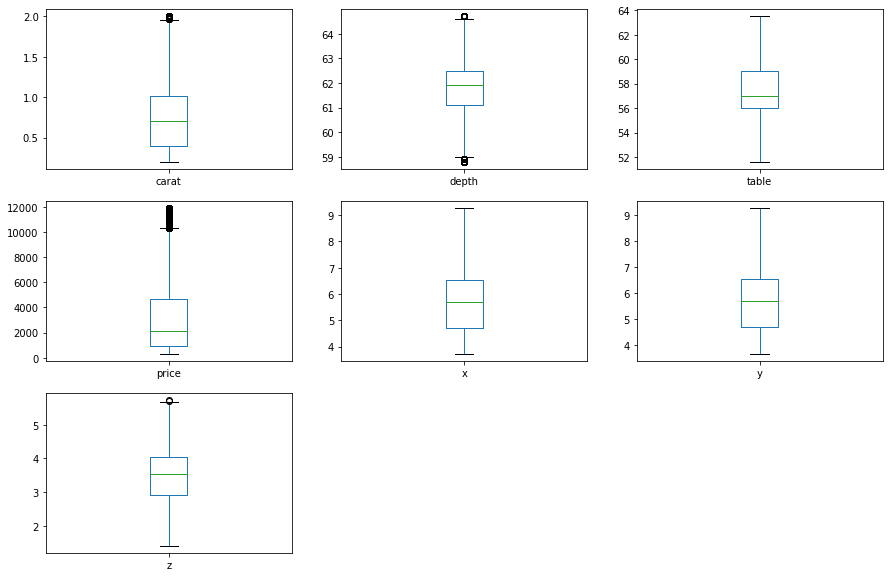

In [15]:
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [16]:
cat=df.select_dtypes(include='object')
numeric=df.select_dtypes(exclude='object')

In [17]:
for i in numeric:
    df[i]=df[i].fillna(df[i].mean())

In [18]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [19]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

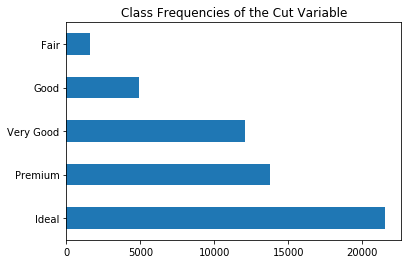

In [20]:
df["cut"].value_counts().plot.barh().set_title("Class Frequencies of the Cut Variable");

In [21]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

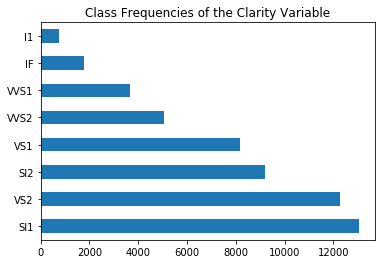

In [22]:
df["clarity"].value_counts().plot.barh().set_title("Class Frequencies of the Clarity Variable");

In [23]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

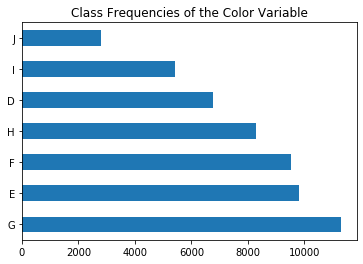

In [24]:
df["color"].value_counts().plot.barh().set_title("Class Frequencies of the Color Variable");

In [25]:
le=LabelEncoder()
df_cat=cat.apply(le.fit_transform)
df_cat

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3
...,...,...,...
53935,2,0,2
53936,1,0,2
53937,4,0,2
53938,3,4,3


In [26]:
df=df.drop(cat,axis=1)
df=pd.concat([df,df_cat],axis=1)

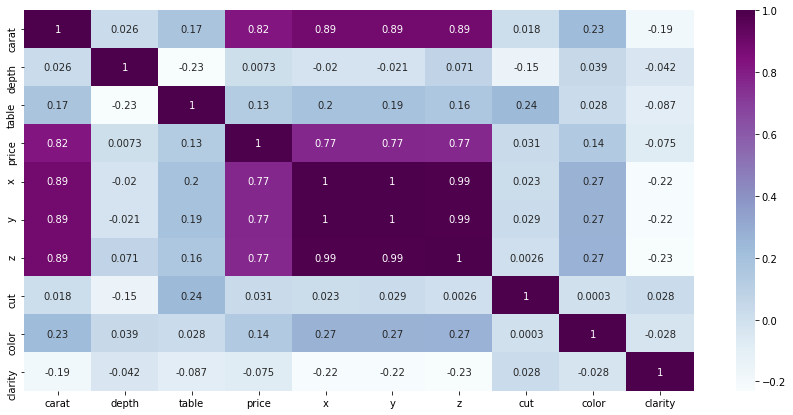

In [27]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True,cmap='BuPu');

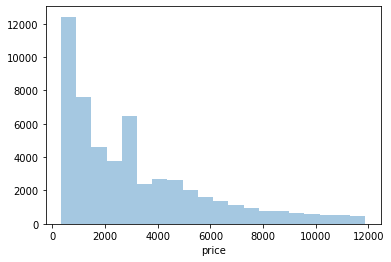

In [28]:
sns.distplot(df.price, kde = False , bins= 20);

In [29]:
df.groupby(["cut","color"])["price"].mean()

cut  color
0    0        3707.617710
     1        3294.860208
     2        3301.552730
     3        3458.296619
     4        4138.617101
     5        3921.697538
     6        3802.038067
1    0        3014.100721
     1        2973.691951
     2        3072.801702
     3        3489.094372
     4        3407.379633
     5        3720.663198
     6        3859.681488
2    0        2293.177901
     1        2297.344982
     2        2762.778643
     3        3054.573655
     4        3122.822327
     5        3329.654240
     6        3660.467387
3    0        3015.159183
     1        2854.180039
     2        3506.663713
     3        3460.033453
     4        3994.957653
     5        4032.273646
     6        4183.438177
4    0        2942.376297
     1        2786.884205
     2        3167.830051
     3        3190.637761
     4        3601.455832
     5        3793.397309
     6        3967.954543
Name: price, dtype: float64

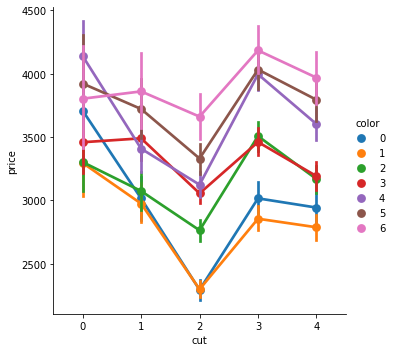

In [30]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

### STATISTICAL ANALYSİS

In [31]:
#variable selection
X=df.drop('price',axis=1)
y=df['price']

In [32]:
import statsmodels.api as sm

xc=sm.add_constant(X)
reg=sm.OLS(y,xc).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 1.407e+04
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:06:22   Log-Likelihood:            -4.6957e+05
No. Observations:               53940   AIC:                         9.392e+05
Df Residuals:                   53930   BIC:                         9.393e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2597.0101    524.300     -4.953      0.000   -3624.642   -1569.378
carat       4438.2098     35.189    126.126      0.000    4369.240    4507.180
depth          7.1778      7.527      0.954      0.340      -7.575      21.930
table        -28.2269      3.307     -8.536      0.000     -34.708     -21.745
x           -337.8163     98.656     -3.424      0.001    -531.183    -144.450
y            992.9701    100.950      9.836      0.000     795.108    1190.832
z           -152.4710     82.496     -1.848      0.065    -314.164       9.222
cut           35.0199      6.400      5.472      0.000      22.476      47.564
color       -102.8982      3.850    -26.726      0.000    -110.444     -95.352
clarity      148.6779      3.764     39.503      0.000     141.301     156.055
==============================================================================
Omnibus:                     7178.147   Durbin-Watson:                   0.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92876.695
Skew:                          -0.093   Prob(JB):                         0.00
Kurtosis:                       9.426   Cond. No.                     7.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values,col) for col in range(0,X.shape[1])]
pd.DataFrame({'vif':vif,'cols':X.columns})

,vif,cols
0,22.213586,carat
1,719.185537,depth
2,721.398448,table
3,8362.942470,x
4,8402.682277,y
5,1689.445843,z
6,7.838489,cut
7,3.605566,color
8,6.282162,clarity


In [34]:
df.corr()

,carat,depth,table,price,x,y,z,cut,color,clarity
carat,1.000000,0.025622,0.173995,0.824994,0.888945,0.888285,0.888844,0.018450,0.227865,-0.189216
depth,0.025622,1.000000,-0.230119,0.007329,-0.019812,-0.021461,0.071088,-0.146605,0.039424,-0.041922
table,0.173995,-0.230119,1.000000,0.129450,0.195324,0.190778,0.160531,0.240303,0.027610,-0.087290
price,0.824994,0.007329,0.129450,1.000000,0.771202,0.772181,0.768656,0.031112,0.143089,-0.074838
x,0.888945,-0.019812,0.195324,0.771202,1.000000,0.998239,0.988981,0.022982,0.269579,-0.224271
y,0.888285,-0.021461,0.190778,0.772181,0.998239,1.000000,0.989077,0.028797,0.269585,-0.221457
z,0.888844,0.071088,0.160531,0.768656,0.988981,0.989077,1.000000,0.002638,0.273645,-0.227513
cut,0.018450,-0.146605,0.240303,0.031112,0.022982,0.028797,0.002638,1.000000,0.000304,0.028235
color,0.227865,0.039424,0.027610,0.143089,0.269579,0.269585,0.273645,0.000304,1.000000,-0.027795
clarity,-0.189216,-0.041922,-0.087290,-0.074838,-0.224271,-0.221457,-0.227513,0.028235,-0.027795,1.000000


In [35]:
X=df.drop(['price','depth'],axis=1)
y=df['price']
xc=sm.add_constant(X)
reg=sm.OLS(y,xc).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 1.583e+04
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:06:22   Log-Likelihood:            -4.6957e+05
No. Observations:               53940   AIC:                         9.392e+05
Df Residuals:                   53931   BIC:                         9.392e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2131.0560    190.151    -11.207      0.000   -2503.753   -1758.359
carat       4438.7430     35.184    126.158      0.000    4369.782    4507.704
table        -28.6091      3.282     -8.716      0.000     -35.043     -22.176
x           -347.8260     98.096     -3.546      0.000    -540.095    -155.557
y            973.6516     98.896      9.845      0.000     779.814    1167.489
z           -105.0760     65.845     -1.596      0.111    -234.133      23.981
cut           34.8552      6.398      5.448      0.000      22.316      47.395
color       -102.8234      3.849    -26.712      0.000    -110.368     -95.279
clarity      148.5806      3.762     39.492      0.000     141.206     155.955
==============================================================================
Omnibus:                     7178.597   Durbin-Watson:                   0.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92861.542
Skew:                          -0.094   Prob(JB):                         0.00
Kurtosis:                       9.425   Cond. No.                     1.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif},index=X.columns)

,vif
carat,21.215644
table,80.672120
x,8157.262054
y,8399.638887
z,1347.820544
cut,7.689796
color,3.605004
clarity,6.130394


### MODEL BUİLDİNG

In [37]:
# Assigning the featurs as X and trarget as y

X = df.drop(['price'],axis=1)
y = df['price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

### Stats Model

lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [41]:
print("X train: ",np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print("X test: ",np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("Model score: ", model.score(X_train, y_train))

X train:  1463.5278397173656
X test:  1451.9436101651827
Model score:  0.7020308345032065


In [42]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.7017311055335057

In [ ]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

In [44]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1450.4673391896963

### PCR Model

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [46]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [47]:
X_reduced_train[0:1,:]

array([[-3.25522143,  0.33780963, -0.59206426, -1.38332076,  0.41013562,
         1.46294306, -0.09085394, -0.14614184,  0.00871499]])

In [48]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([44.67, 60.32, 71.26, 81.07, 90.39])

In [49]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
print("pcr model intercept: ",pcr_model.intercept_)
print("pcr model coef: ", pcr_model.coef_)

pcr model intercept:  3166.922724426317
pcr model coef:  [ 1044.15981269    41.47273402  -164.94941968  -536.24264027
  -321.91254995   -39.46004224 -1340.59181394   350.01879132
  1235.91514088]


### Predict

In [50]:
y_pred = pcr_model.predict(X_reduced_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1463.5278397173656

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

r2_score(y_train, y_pred)

0.7020308345032065

In [56]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1729.647606544611

# Random Forest

### Model & Predict

In [57]:
rr  = RandomForestRegressor()

In [58]:
rr.fit(X_train,y_train)
y_pred = rr.predict(X_test)
r2_score(y_test,y_pred)

0.9097300393210055

In [59]:
rr.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor()>

### Model Tuning

In [60]:
n_estimators = [int(x) for x in np.linspace(10,200,10)]
max_depth = [int(x) for x in np.linspace(10,100,10)]
min_samples_split = [2,3,4,5,10]
min_samples_leaf = [1,2,4,10,15,20]
random_grid = {'n_estimators':n_estimators,'max_depth':max_depth,
               'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

random_grid

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'min_samples_split': [2, 3, 4, 5, 10],
 'min_samples_leaf': [1, 2, 4, 10, 15, 20]}

In [61]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               cv = 3)

rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'min_samples_leaf': [1, 2, 4, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 3, 4, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]})

In [62]:
y_pred = rf_random.predict(X_test)
r2_score(y_test,y_pred)

0.911725699476174

In [63]:
rf_random.best_params_

{'n_estimators': 136,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 30}

In [64]:
rf = RandomForestRegressor(n_estimators=178,
                         min_samples_split=5,
                         min_samples_leaf=1,
                         max_depth=50)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
r2_score(y_test,y_pred)

0.9097139195901933